<a href="https://colab.research.google.com/github/30JD/Sentiment_Analysis_via_Deep_Learning/blob/master/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import nltk
import tensorflow as tf
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('train.tsv', sep="\t")
test = pd.read_csv('test.tsv', sep="\t")




In [0]:
test["Sentiment"] = -10
test.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,156061,8545,An intermittently pleasing but mostly routine ...,-10
1,156062,8545,An intermittently pleasing but mostly routine ...,-10
2,156063,8545,An,-10
3,156064,8545,intermittently pleasing but mostly routine effort,-10
4,156065,8545,intermittently pleasing but mostly routine,-10


In [0]:
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
nltk.download("stopwords")
stop_words = set(stopwords.words('english')) 
not_delete = ["but", "shan't", "wasn't", "couldn't", "didn't", "hadn't", "against", "no", "haven't", "shouldn't", "needn't", "wouldn't", "aren't", "mightn't", "won't", "isn't", "hasn't", "don't", "mustn't", "doesn't", "not"]
stop_words = [w for w in stop_words if w not in not_delete]
print(stop_words)

df=pd.concat([train, test], ignore_index = True)

df = df.applymap(lambda s:s.lower() if type(s) == str else s)
#del test, train

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['the', 'from', 'about', 'd', 'below', 'with', 'didn', 'it', "she's", 's', 'they', 'same', 'been', 'should', "weren't", 'wouldn', 'itself', 'these', 'for', 'all', 'at', 'own', 'through', 'them', 'and', 'am', "it's", 'above', 've', 'mightn', 'he', 'can', 'shouldn', 'where', 'when', 'ain', 'whom', 'why', 'some', 'ours', 'their', 'will', 'to', 'both', 'nor', 'in', 'had', 'myself', 'this', 'than', 'hadn', 'here', "you'd", 'because', 'over', 'hasn', 'under', 'couldn', 'what', 'or', 'does', 'his', 'she', "that'll", 'yourself', 'did', 'do', 'yours', 'now', 'by', 'those', 'few', 'how', 'aren', 're', 'hers', 'who', 'up', 'more', 'once', 'be', 'haven', "you're", 'most', 'y', 'is', 'as', 'i', 'there', "you'll", 'her', 'him', 'until', 'shan', 'off', 'you', 'was', 'out', 'between', 'further', 'just', 'weren', 'any', 'too', 'we', 'before', 'having', 'again', 'its', 'me', 'herself', 

In [0]:
porter = PorterStemmer()
def stem_sentence(sentence):
    token_words=word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        if word not in stop_words:
            stem_sentence.append(porter.stem(word))
            stem_sentence.append(" ")
    return "".join(stem_sentence)

In [0]:
def clean_review(phrase):
    clean_review = [ ]
    for i in range(0, len(phrase)):
        review = str(phrase[i])
        review = re.sub("[^a-zA-Z]", " ", review)
        stem_review = stem_sentence(review)
        clean_review.append(stem_review)
    return clean_review

In [0]:
nltk.download('punkt')
df['clean_review'] = clean_review(df.Phrase.values)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,PhraseId,SentenceId,Phrase,Sentiment,clean_review
0,1,1,a series of escapades demonstrating the adage ...,1,seri escapad demonstr adag good goos also good...
1,2,1,a series of escapades demonstrating the adage ...,2,seri escapad demonstr adag good goos
2,3,1,a series,2,seri
3,4,1,a,2,
4,5,1,series,2,seri


In [0]:
df.shape

(222352, 5)

In [0]:
drop_list = []
for i in range(0, len(df.Phrase)):
    if len(df.clean_review[i].split()) < 2:
        drop_list.append(i)
df = df.drop(drop_list, axis = 0)

df.shape

(171314, 5)

In [0]:
test = df[df.Sentiment == -10]
test.drop("Sentiment", axis =1, inplace = True)
print(test.shape)
test.head()

(48686, 4)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,PhraseId,SentenceId,Phrase,clean_review
156060,156061,8545,an intermittently pleasing but mostly routine ...,intermitt pleas but mostli routin effort
156061,156062,8545,an intermittently pleasing but mostly routine ...,intermitt pleas but mostli routin effort
156063,156064,8545,intermittently pleasing but mostly routine effort,intermitt pleas but mostli routin effort
156064,156065,8545,intermittently pleasing but mostly routine,intermitt pleas but mostli routin
156065,156066,8545,intermittently pleasing but,intermitt pleas but


In [0]:
train = df[df.Sentiment != -10]
print(train.shape)



(122628, 5)


In [0]:
whole_text = list(df.clean_review.values)
sen_len = []
for text in whole_text:
    word = word_tokenize(text)
    sen_len.append(len(word))
max_len = np.max(sen_len)
max_len

30

In [0]:
print(sen_len)

[16, 6, 5, 5, 4, 2, 2, 2, 2, 2, 10, 10, 9, 8, 8, 7, 7, 6, 5, 4, 3, 3, 3, 2, 2, 6, 4, 4, 3, 2, 2, 2, 2, 11, 5, 2, 3, 3, 2, 6, 5, 5, 4, 4, 2, 2, 2, 13, 13, 8, 3, 3, 2, 5, 5, 4, 4, 4, 3, 3, 2, 2, 5, 5, 2, 2, 2, 3, 3, 2, 5, 5, 4, 2, 2, 2, 2, 13, 5, 2, 2, 3, 3, 2, 8, 8, 3, 2, 2, 2, 5, 5, 2, 2, 3, 2, 6, 5, 5, 3, 2, 2, 2, 2, 2, 10, 9, 9, 9, 8, 8, 7, 7, 6, 6, 5, 4, 3, 3, 2, 4, 3, 3, 3, 2, 3, 3, 3, 2, 14, 14, 14, 4, 4, 4, 3, 3, 2, 10, 9, 8, 7, 4, 2, 2, 2, 3, 2, 2, 14, 2, 12, 12, 7, 7, 7, 7, 4, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 5, 4, 4, 3, 2, 3, 2, 2, 2, 2, 14, 13, 13, 13, 12, 11, 11, 10, 10, 9, 9, 2, 7, 7, 2, 2, 5, 2, 3, 3, 2, 2, 7, 7, 6, 6, 5, 4, 3, 2, 2, 13, 7, 2, 2, 5, 5, 2, 3, 3, 2, 2, 6, 6, 5, 5, 5, 2, 2, 2, 3, 2, 5, 2, 2, 2, 3, 3, 2, 16, 6, 5, 4, 4, 3, 2, 10, 9, 9, 6, 6, 6, 5, 5, 2, 3, 3, 2, 3, 2, 2, 8, 8, 7, 7, 3, 2, 4, 4, 3, 3, 2, 4, 4, 4, 4, 3, 3, 3, 3, 2, 4, 3, 3, 2, 2, 20, 20, 5, 5, 5, 2, 3, 2, 15, 14, 13, 5, 5, 4, 3, 3, 2, 2, 2, 8, 7, 2, 2, 5, 5, 2, 3, 3, 3, 2, 11, 11, 11, 11, 10, 3, 3,

No handles with labels found to put in legend.


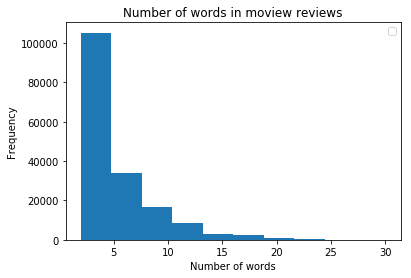

In [0]:
f = plt.figure()
plt.legend()
plt.hist(sen_len)
plt.title("Number of words in moview reviews")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()
f.savefig("words.pdf", bbox_inches='tight')


In [0]:
import statistics
print(statistics.mean(sen_len))

4.9320254036447695


In [0]:
from keras.utils import to_categorical
X_test = test.clean_review.values


Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split
training_set, testing_set = train_test_split(train, test_size = 0.2)
train_set, val_set = train_test_split(training_set, test_size = 0.2)
X_train = train_set.clean_review.values
Y_train = to_categorical(train_set.Sentiment.values)
X_val = val_set.clean_review.values
Y_val = to_categorical(val_set.Sentiment.values)
X_test = testing_set.clean_review.values
Y_test = to_categorical(testing_set.Sentiment.values)

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(78481,)
(78481, 5)
(19621,)
(19621, 5)


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
tk = Tokenizer(lower=True, filters='')
tk.fit_on_texts(whole_text)
X_train = tk.texts_to_sequences(X_train)
X_val = tk.texts_to_sequences(X_val)
X_test = tk.texts_to_sequences(X_test)

In [0]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_val = pad_sequences(X_val, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
print(X_train.shape, X_val.shape, X_test.shape)

(78481, 30) (19621, 30) (24526, 30)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, GRU
from keras import backend
from keras.optimizers import Adam, SGD

In [0]:
model1 = Sequential()
model1.add(Embedding(15000, 128))
model1.add(LSTM(64, dropout = 0.3, recurrent_dropout=0.3, return_sequences=True))
model1.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.3, return_sequences=False))
model1.add(Dense(5, activation='softmax'))
opt = Adam(lr=0.001, decay=1e-5)
model1.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1920000   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 1,981,989
Trainable params: 1,981,989
Non-trainable params: 0
_________________________________________________________________


In [0]:
history1=model1.fit(X_train, Y_train, batch_size = 64, epochs = 4, verbose = 1, validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.cast instead.
Train on 78481 samples, validate on 19621 samples
Epoch 1/4
78481/78481 [==============================] - 125s 2ms/step - loss: 1.1155 - acc: 0.5369 - val_loss: 0.9761 - val_acc: 0.5881
Epoch 2/4
78481/78481 [==============================] - 123s 2ms/step - loss: 0.9134 - acc: 0.6187 - val_loss: 0.9347 - val_acc: 0.6010
Epoch 3/4
78481/78481 [==============================] - 123s 2ms/step - loss: 0.8493 - acc: 0.6471 - val_loss: 0.9149 - val_acc: 0.6094
Epoch 4/4
78481/78481 [==============================] - 123s 2ms/step - loss: 0.8031 - acc: 0.6634 - val_loss: 0.9129 - val_acc: 0.6100


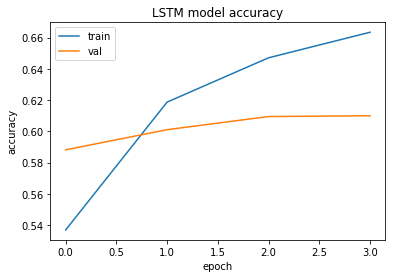

In [0]:
f = plt.figure()
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
f.savefig("LSTM.pdf", bbox_inches='tight')

In [0]:
p1 = model1.predict_classes(X_test, verbose = 1)


24526/24526 [==============================] - 8s 323us/step


In [0]:
y_test = testing_set.Sentiment.values
print(p1)
print(y_test)

count1 = 0
for i in range(0, len(p1)):
  if(p1[i]!=y_test[i]):
    count1 += 1

error1 = count1/len(p1)
print(error1)

[2 2 4 ... 1 3 1]
[2 3 4 ... 1 3 1]
0.38326673733996575


In [0]:
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Dropout


In [0]:

model2 = Sequential()
model2.add(Embedding(15000, 128, input_length = max_len))
model2.add(Dropout(0.2))
model2.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu', strides=1))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(5, activation='softmax'))
opt2 = Adam(lr=0.001, decay=1e-5)
model2.compile(loss='categorical_crossentropy', optimizer=opt2, metrics=['accuracy'])


In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 30, 128)           1920000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 30, 64)            16448     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 645       
Total para

In [0]:
history2 = model2.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=4, batch_size=64, verbose=1)

Train on 78481 samples, validate on 19621 samples
Epoch 1/4
78481/78481 [==============================] - 51s 651us/step - loss: 1.1095 - acc: 0.5395 - val_loss: 0.9650 - val_acc: 0.5956
Epoch 2/4
78481/78481 [==============================] - 48s 615us/step - loss: 0.8856 - acc: 0.6292 - val_loss: 0.9108 - val_acc: 0.6107
Epoch 3/4
78481/78481 [==============================] - 48s 615us/step - loss: 0.8004 - acc: 0.6615 - val_loss: 0.9197 - val_acc: 0.6063
Epoch 4/4
78481/78481 [==============================] - 48s 606us/step - loss: 0.7426 - acc: 0.6831 - val_loss: 0.9149 - val_acc: 0.6105


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


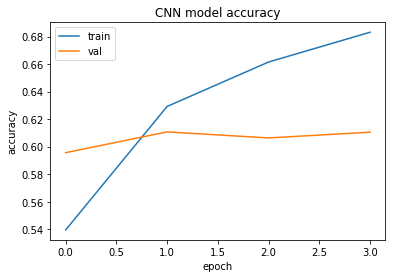

In [0]:
f = plt.figure()
print(history2.history.keys())
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
f.savefig("CNN.pdf", bbox_inches='tight')

In [0]:
p2 = model2.predict_classes(X_test, verbose = 1)


24526/24526 [==============================] - 2s 82us/step


In [0]:
count2 = 0
for i in range(0, len(p2)):
  if(p2[i]!=y_test[i]):
    count2 += 1

error2 = count2/len(p2)
print(error2)


0.38090190002446384


In [0]:
model3 = Sequential()
model3.add(Embedding(15000, 128))
model3.add(GRU(64, dropout = 0.3, recurrent_dropout=0.3, return_sequences=True))
model3.add(GRU(32, dropout = 0.2, recurrent_dropout = 0.3, return_sequences=False))
model3.add(Dense(5, activation='softmax'))
opt = Adam(lr=0.001, decay=1e-5)
model3.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         1920000   
_________________________________________________________________
gru_3 (GRU)                  (None, None, 64)          37056     
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                9312      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 165       
Total params: 1,966,533
Trainable params: 1,966,533
Non-trainable params: 0
_________________________________________________________________


In [0]:
history3 = model3.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=4, batch_size=64, verbose=1)


Train on 78481 samples, validate on 19621 samples
Epoch 1/4
78481/78481 [==============================] - 106s 1ms/step - loss: 1.0786 - acc: 0.5474 - val_loss: 0.9584 - val_acc: 0.5933
Epoch 2/4
78481/78481 [==============================] - 104s 1ms/step - loss: 0.8998 - acc: 0.6224 - val_loss: 0.9272 - val_acc: 0.6063
Epoch 3/4
78481/78481 [==============================] - 106s 1ms/step - loss: 0.8334 - acc: 0.6509 - val_loss: 0.9136 - val_acc: 0.6122
Epoch 4/4
78481/78481 [==============================] - 105s 1ms/step - loss: 0.7906 - acc: 0.6682 - val_loss: 0.9091 - val_acc: 0.6145


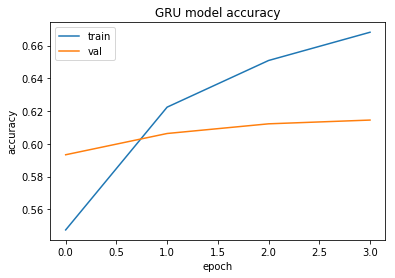

In [0]:
f=plt.figure()
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('GRU model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
f.savefig("GRU.pdf", bbox_inches='tight')

In [0]:
p3 = model3.predict_classes(X_test, verbose = 1)

24526/24526 [==============================] - 7s 292us/step


In [0]:
count3 = 0
for i in range(0, len(p3)):
  if(p3[i]!=y_test[i]):
    count3 += 1

error3 = count3/len(p3)
print(error3)

0.37817010519448746


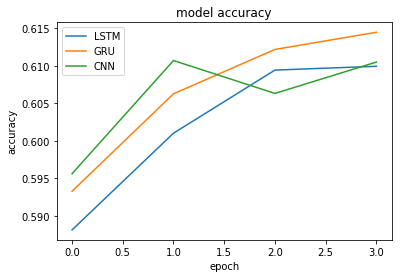

In [0]:
f = plt.figure()
plt.plot(history1.history['val_acc'])
plt.plot(history3.history['val_acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LSTM', 'GRU', 'CNN'], loc='upper left')
plt.show()
f.savefig("acc.pdf", bbox_inches='tight')

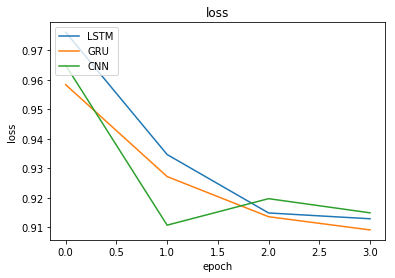

In [0]:
f = plt.figure()
plt.plot(history1.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['LSTM', 'GRU', 'CNN'], loc='upper left')
plt.show()
f.savefig("loss.pdf", bbox_inches='tight')

In [0]:
model4 = Sequential()
model4.add(Embedding(15000, 128, input_length = max_len))
model4.add(Dropout(0.2))
model4.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu', strides=1))
model4.add(GlobalMaxPooling1D())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(5, activation='softmax'))
opt2 = Adam(lr=0.001, decay=1e-5)
model4.compile(loss='categorical_crossentropy', optimizer=opt2, metrics=['accuracy'])
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 30, 128)           1920000   
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 30, 64)            16448     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 645       
Total para

In [0]:
history4 = model4.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=2, batch_size=64, verbose=1)

Train on 78481 samples, validate on 19621 samples
Epoch 1/2
78481/78481 [==============================] - 54s 685us/step - loss: 1.1135 - acc: 0.5380 - val_loss: 0.9730 - val_acc: 0.5859
Epoch 2/2
78481/78481 [==============================] - 52s 658us/step - loss: 0.8857 - acc: 0.6284 - val_loss: 0.9087 - val_acc: 0.6133


In [0]:
p4 = model4.predict_classes(X_test, verbose = 1)

24526/24526 [==============================] - 2s 93us/step


In [0]:
count4 = 0
for i in range(0, len(p4)):
  if(p4[i]!=y_test[i]):
    count4 += 1

error4 = count4/len(p4)
print(error4)

0.3822474109108701


In [0]:
a1 = 1 - error1
a2 = 1 - error2
a3 = 1 - error3
a4 = 1 - error4
a = [a1, a2, a3, a4]
print(a)
row = ['LSTM', 'CNN at epoch 4', 'GRU', 'CNN at epoch 2']
m = [a, row]
n = np.random.random((4,2))

[0.6167332626600343, 0.6190980999755362, 0.6218298948055125, 0.6177525890891299]
